# Simulation Notebook

Runs a simulation for an agent with defined hyperparameters

## Imports

In [32]:
import serial
import time
import random
import multiprocessing as mp
import visualizations
import copy

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tqdm
from tqdm import tqdm

# Module imports
import rl_agent
from rl_agent import SoftmaxAgent

import solar_env
from solar_env import SolarEnv

import experiment_functions as ef

In [33]:
# Declare random seed
RANDOM_SEED = 1

In [34]:
# Set cache dir
CACHE_DIR = '_ignore'

## Functions

In [24]:
def create_env_from_data_path(path, env_roll_frequency):
    # Set environment path
    experiment_data_path = path
    # Load in and format data, convert to array for environment
    data_df = solar_env.load_and_format_solar_df(experiment_data_path)
    env_reward_array = solar_env.convert_solar_df_to_value_array(data_df, 5)
    return SolarEnv(env_reward_array, movement_penalty=0.0001, roll_frequency=env_roll_frequency)

## Run Simulation

### Env set up for experiment

In [44]:
# Set environment path
# experiment_data_path = 'simulation_data/data/initial_environments/yard_light_scan_2022_4_25.csv'
experiment_data_path = 'simulation_data/data/initial_environments/room_light_scan_3_23_22.csv'
# Set environment settings
env_roll_frequency = 3600
# Create environment
sim_env = create_env_from_data_path(experiment_data_path, env_roll_frequency=env_roll_frequency)

### Set simulation and agent parameters

In [36]:
# Set number of simulation steps
num_sim_steps = 31536000
logging_interval = 3600

In [37]:
# Set agent hyper
agent_parameters = {
    'temperature': 0.001,
    'actor_step_size': 1.0,
    'critic_step_size': 0.1,
    'avg_reward_step_size': 1.0
}

In [38]:
total_reward, tracking_df = ef.run_agent_experiment(sim_env, steps=num_sim_steps, seed=RANDOM_SEED, 
                                                    day_partitions=24, **agent_parameters, 
                                                    hide_progress_bar=False, 
                                                    logging_interval=logging_interval)

  0%|▏                                                                                                                                                                 | 32559/31536000 [00:02<35:41, 14712.69it/s]


KeyboardInterrupt: 

In [16]:
# Cache the results
tracking_df.to_pickle(CACHE_DIR + '/' + 'cache_tracking_df_indoor_new_param.pickle')

In [45]:
# Load in the results
tracking_df = pd.read_pickle(CACHE_DIR + '/' + 'cache_tracking_df_indoor_new_param.pickle')
# tracking_df = pd.read_pickle(CACHE_DIR + '/' + 'cache_tracking_df_outdoor_new_param.pickle')

## Visualize Performance

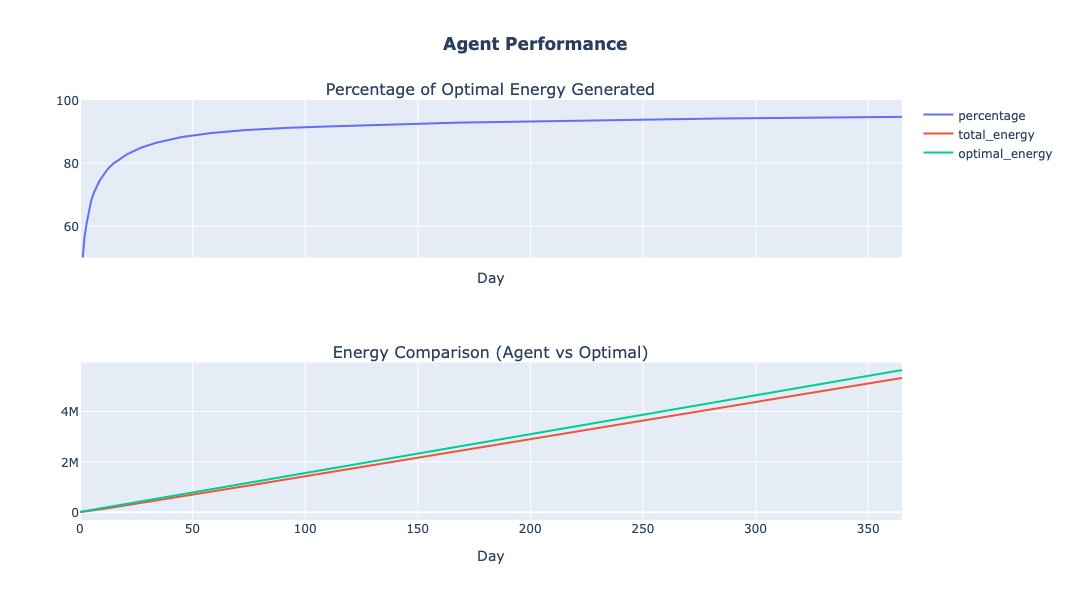

In [46]:
# Plot the energy generated compared to perfectly optimal energy
visualizations.plot_energy_by_day(tracking_df, sim_env, height=600, width=800, plot_title='<b>Agent Performance</b>')

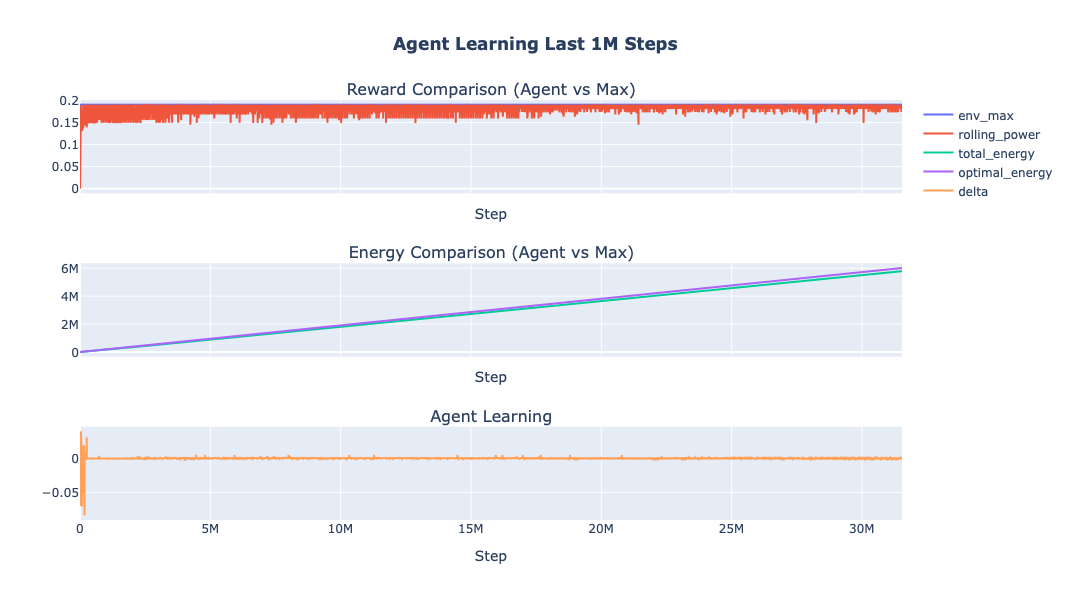

In [43]:
# Plot the agents rolling power and delta values
visualizations.plot_rolling_power(tracking_df, sim_env, height=600, width=800, plot_title='<b>Agent Learning Last 1M Steps</b>')

Explore miscellanous things

**State Visits by Day**

In [ ]:
state_visits_downsampled = tracking_df[tracking_df['step']%86400==0]

In [ ]:
visualizations.plot_array_evolution(state_visits_downsampled['state_visits'].to_list(), step_interval=1, step_name='Day')

**State Visits by Hour, First 5 Days**

In [ ]:
first_five_days = tracking_df[(tracking_df['step'] <= 86400*5) & (tracking_df['step']%3600==0)]

In [ ]:
first_five_days['state_visits_shift'] = first_five_days['state_visits'].shift(1)

In [ ]:
first_five_days.dropna(inplace=True)

In [ ]:
first_five_days['state_visits_diff'] = first_five_days['state_visits'] - first_five_days['state_visits_shift']

In [ ]:
visualizations.plot_array_evolution(first_five_days['state_visits_diff'].to_list(), step_interval=1, step_name='Hour')

**Env Rewards by Hour, First 2 Days**

In [ ]:
env_downsampled = tracking_df[(tracking_df['step'] <= 86400*2) & (tracking_df['step']%3600==0)]['env_rewards']

In [ ]:
visualizations.plot_array_evolution(env_downsampled.to_list(), step_interval=1, step_name='hour')